In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score





In [3]:
df = pd.read_csv('Iris.csv')
df=df.drop('class', axis=1)
colors = ['#DF2020', '#81DF20', '#2095DF']


In [4]:
df.shape


(150, 4)

In [5]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#sepallenght
min_thresold, max_thresold = df.sepallength.quantile([0.001, 0.999])
df2 = df[(df.sepallength<max_thresold) & (df.sepallength>min_thresold)] 
print(df[~(df.sepallength<max_thresold) & (df.sepallength>min_thresold)])

#sepalwidth
min_thresold, max_thresold = df2.sepalwidth.quantile([0.001, 0.999])
df2 = df2[(df2.sepalwidth<max_thresold) & (df2.sepalwidth>min_thresold)] 



#petallength
min_thresold, max_thresold = df2.petallength.quantile([0.001, 0.999])
df2 = df2[(df2.petallength<max_thresold) & (df2.petallength>min_thresold)] 

#petalwidth
min_thresold, max_thresold = df2.petalwidth.quantile([0.001, 0.999])
df2 = df2[(df2.petalwidth<max_thresold) & (df2.petalwidth>min_thresold)] 

df2.shape



     sepallength  sepalwidth  petallength  petalwidth
131          7.9         3.8          6.4         2.0


(136, 4)

In [7]:
#Davies-Bouldin
kmeans = KMeans(n_clusters=3, random_state=30)
labels = kmeans.fit_predict(df)
db_index = davies_bouldin_score(df, labels)
print(db_index)

0.662322864989869


In [73]:
k_means=KMeans(n_clusters=3,random_state=0).fit(df)
k_means.labels_
df['cluster'] = k_means.fit_predict(df)
centroids=k_means.cluster_centers_
cen_x=[i[0]for i in centroids]
cen_y=[i[1]for i in centroids]
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

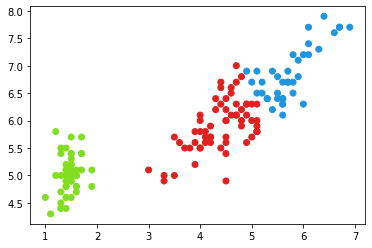

In [74]:
#print(df)
plt.scatter(df.petallength,df.sepallength,c=df.c)


In [41]:
wcss=[]

for i in range(1,11):
    k_means=KMeans(n_clusters=i,random_state=0).fit(df)
    k_means.labels_   
    wcss.append(k_means.inertia_)

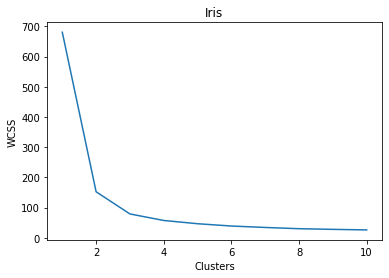

In [42]:
plt.plot(range(1,11),wcss)
plt.title("Iris")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()